In [1]:
import os
import sys
sys.path.insert(0, os.path.relpath('../../../../..')) 



In [2]:

from recidiviz.calculator.modeling.population_projection.super_simulation import SuperSimulation
from recidiviz.calculator.modeling.population_projection.compartment_transitions import CompartmentTransitions
from recidiviz.calculator.modeling.population_projection.release_transitions import ReleasedTransitions
from recidiviz.calculator.modeling.population_projection.spark_policy import SparkPolicy
import pandas as pd
from functools import partial
import yaml

../../../../../recidiviz/calculator/modeling/population_projection/super_simulation.py:92: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  def _convert_to_relative_date_from_timestamp(self, timestamp: pd.datetime):


/Users/pacopoler/.local/share/virtualenvs/pulse-data-Jd9N3JcA/lib/python3.7/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


initialization time:  177.97459506988525
simulation_time:  101.42095899581909


(           (55, 'Burglary')  (55, 'Drug offenses')  (55, 'Other')  \
 time_step                                                           
 2018                      0                      0              0   
 2019                      0                      0              0   
 
            (55, 'Robbery')  (55, 'Sexual offenses')  \
 time_step                                             
 2018                     0                        0   
 2019                     0                        0   
 
            (55, 'Theft/forgery/fraud')  (55, 'Violent personal')  \
 time_step                                                          
 2018                                 0                         0   
 2019                                 0                         0   
 
            (55, 'Weapons')  (55, 'murder/manslaughter')  (56, 'Burglary')  \
 time_step                                                                   
 2018                     0                            0  

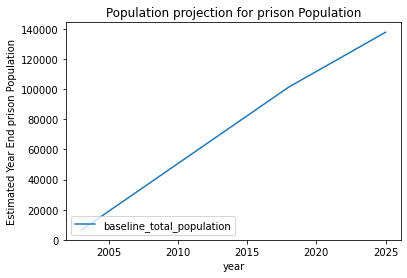

In [3]:
test = open('../state/FL/FL_prison_model_inputs.yaml')
test_sim = SuperSimulation(test)
test_sim.simulate_baseline('pretrial', 'prison')

In [4]:
test_sim.data_dict['outflows_data'].offense.unique()

array(['Burglary', 'Drug offenses', 'murder/manslaughter', 'Other',
       'Robbery', 'Sexual offenses', 'Theft/forgery/fraud',
       'Violent personal', 'Weapons'], dtype=object)

In [4]:
affected_crimes = {
    'ASL1342': 0.5, 
    'NAR3038': 3, 
    'NAR3087': 10, 
    'DWI5406': 1, 
    'DWI5449': 0.25, 
    'DWI5450': 0.5, 
    'LIC6834': 1, 
    'LIC6860': 1, 
    'WPN5296': 5,   
    'WPN5297': 2
}


# Policy Option Methods
def abolish_mm(mm, retroactive=False):
    return partial(IncarceratedTransitions.abolish_mandatory_minimum, 
                   current_mm=mm, 
                   outflow = 'release',
                   retroactive=retroactive)


policy_list_non_retroactive = [
    SparkPolicy(policy_fn=abolish_mm(affected_crimes[crime]),
                spark_compartment='prison',
                sub_population={'offense_code': crime},
                apply_retroactive=False)
    for crime in affected_crimes
]
    
test_results = test_sim.simulate_policy(policy_list_non_retroactive, 'prison')

NameError: name 'IncarceratedTransitions' is not defined

In [4]:
simulation_tag = 'VA_SB_5046'
test_sim.upload_simulation_results_to_bq('recidiviz-staging', simulation_tag)

/Users/justine/.local/share/virtualenvs/recidiviz-research--v7DE6HN/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [5]:
test_results

(      jail  release        prison
 year                             
 2016   0.0      0.0  0.000000e+00
 2017   0.0      0.0  0.000000e+00
 2018   0.0      0.0  0.000000e+00
 2019   0.0      0.0  0.000000e+00
 2020   0.0      0.0  0.000000e+00
 2021   0.0      0.0  0.000000e+00
 2022   0.0     -0.0  1.315663e+07
 2023   0.0     -0.0  3.163027e+07
 2024   0.0     -0.0  5.424741e+07
 2025   0.0     -0.0  8.023826e+07,
       jail      release       prison
 year                                
 2016   0.0     0.000000     0.000000
 2017   0.0     0.000000     0.000000
 2018   0.0     0.000000     0.000000
 2019   0.0     0.000000     0.000000
 2020   0.0     0.000000     0.000000
 2021   0.0     0.000000     0.000000
 2022   0.0  -409.277499   409.277498
 2023   0.0  -983.956718   983.956715
 2024   0.0 -1687.532192  1687.532187
 2025   0.0 -2496.057356  2496.057350)

In [6]:
test_sim.output_data['life_years']

,jail,release,prison
year,,,
2016,0.0,0.000000,0.000000
2017,0.0,0.000000,0.000000
2018,0.0,0.000000,0.000000
2019,0.0,0.000000,0.000000
2020,0.0,0.000000,0.000000
2021,0.0,0.000000,0.000000
2022,0.0,-409.277499,409.277498
2023,0.0,-983.956718,983.956715
2024,0.0,-1687.532192,1687.532187


In [7]:
test_sim.output_data['cost_avoidance']

,jail,release,prison
year,,,
2016,0.0,0.0,0.000000e+00
2017,0.0,0.0,0.000000e+00
2018,0.0,0.0,0.000000e+00
2019,0.0,0.0,0.000000e+00
2020,0.0,0.0,0.000000e+00
2021,0.0,0.0,0.000000e+00
2022,0.0,-0.0,1.315663e+07
2023,0.0,-0.0,3.163027e+07
2024,0.0,-0.0,5.424741e+07
